In [5]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons, make_blobs
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

from imblearn import FunctionSampler
from imblearn.pipeline import make_pipeline

print(__doc__)

rng = np.random.RandomState(42)


def plot_scatter(X, y, title):
    """Function to plot some data as a scatter plot."""
    plt.figure()
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label='Class #1')
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label='Class #0')
    plt.legend()
    plt.title(title)

Automatically created module for IPython interactive environment


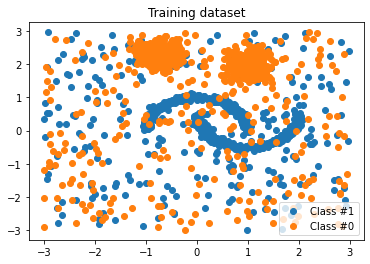

In [7]:
moons, _ = make_moons(n_samples=500, noise=0.05)
blobs, _ = make_blobs(n_samples=500, centers=[(-0.75, 2.25),
                                              (1.0, 2.0)],
                      cluster_std=0.25)
outliers = rng.uniform(low=-3, high=3, size=(500, 2))
X_train = np.vstack([moons, blobs, outliers])
y_train = np.hstack([np.ones(moons.shape[0], dtype=np.int8),
                     np.zeros(blobs.shape[0], dtype=np.int8),
                     rng.randint(0, 2, size=outliers.shape[0],
                                 dtype=np.int8)])

plot_scatter(X_train, y_train, 'Training dataset')

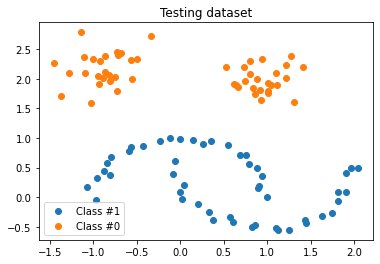

In [10]:
moons, _ = make_moons(n_samples=50, noise=0.05)
blobs, _ = make_blobs(n_samples=50, centers=[(-0.75, 2.25),
                                             (1.0, 2.0)],
                      cluster_std=0.25)
X_test = np.vstack([moons, blobs])
y_test = np.hstack([np.ones(moons.shape[0], dtype=np.int8),
                    np.zeros(blobs.shape[0], dtype=np.int8)])

plot_scatter(X_test, y_test, 'Testing dataset')

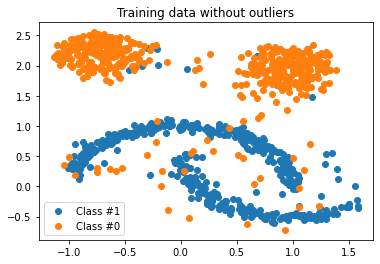

In [12]:
def outlier_rejection(X, y):
    """This will be our function used to resample our dataset."""
    model = IsolationForest(max_samples=100,
                            contamination=0.4,
                            random_state=rng)
    model.fit(X)
    y_pred = model.predict(X)
    return X[y_pred == 1], y[y_pred == 1]


reject_sampler = FunctionSampler(func=outlier_rejection)
X_inliers, y_inliers = reject_sampler.fit_resample(X_train, y_train)
plot_scatter(X_inliers, y_inliers, 'Training data without outliers')

In [13]:
pipe = make_pipeline(FunctionSampler(func=outlier_rejection),
                     LogisticRegression(solver='lbfgs', multi_class='auto',
                                        random_state=rng))
y_pred = pipe.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_pred))

clf = LogisticRegression(solver='lbfgs', multi_class='auto', random_state=rng)
y_pred = clf.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, y_pred))

plt.show()


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        50
           1       1.00      0.82      0.90        50

    accuracy                           0.91       100
   macro avg       0.92      0.91      0.91       100
weighted avg       0.92      0.91      0.91       100

